# Projet : Forage de données IFT870

# Analyse des données
Ce notebook contient les traces des démarches entreprises pour l'analyse des données mat bruts. Les différentes analyses sont les suivantes : 
- Pourcentage de la surface de la tumeur par rapport à toute l'image
    - Pour toutes les données
    - Pour une classe
- Coordonnées moyenne de la tumeur
    - Pour toutes les données
    - Pour une classe  

In [1]:
from pymatreader import read_mat
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def separate_mat_files():
    directory = 'dataset/mat/'
    list_file_class1 = []
    list_file_class2 = []
    list_file_class3 = []
    
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename) 

        if os.path.isfile(f):
            mat = read_mat(f)
            
            if mat['cjdata']['label'] == 1.0:
                list_file_class1.append(mat)
                
            if mat['cjdata']['label'] == 2.0:
                list_file_class2.append(mat)
                
            if mat['cjdata']['label'] == 3.0:
                list_file_class3.append(mat)
                
    return list_file_class1, list_file_class2, list_file_class3

In [3]:
list_file_class1, list_file_class2, list_file_class3 = separate_mat_files()

# Pourcentage de la surface de la tumeur par rapport à toute l'image

In [4]:
def calculate_percentage_tumor_per_class(list_file_class):
    
    size_image = 512 * 512
    list_percentage_per_class = []
    
    for i in range(len(list_file_class)):
        size_tumor_i = list_file_class[i]['cjdata']['tumorMask'].sum()
        percentage_tumor_i = size_tumor_i / size_image*100
        list_percentage_per_class.append(percentage_tumor_i)
    
    return list_percentage_per_class

percentage_class1 = calculate_percentage_tumor_per_class(list_file_class1)
percentage_class2 = calculate_percentage_tumor_per_class(list_file_class2)
percentage_class3 = calculate_percentage_tumor_per_class(list_file_class3)

In [5]:
percentage_all_data = percentage_class1 + percentage_class2 + percentage_class3

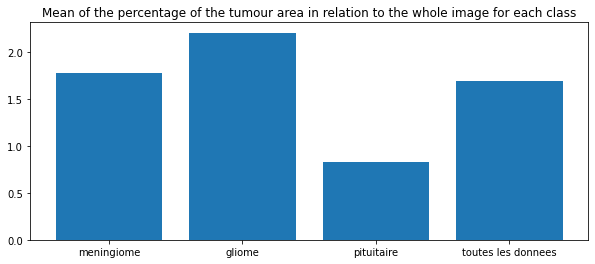

In [6]:
class_names = ['meningiome', 'gliome', 'pituitaire', 'toutes les donnees']

percentage_class1_mean = np.mean(percentage_class1)
percentage_class2_mean = np.mean(percentage_class2)
percentage_class3_mean = np.mean(percentage_class3)
percentage_all_data_mean = np.mean(percentage_all_data)

list_mean = []
list_mean.append(percentage_class1_mean)
list_mean.append(percentage_class2_mean)
list_mean.append(percentage_class3_mean)
list_mean.append(percentage_all_data_mean)

plt.figure(figsize=(10,4))  
plt.bar(class_names, height=list_mean)
plt.title('Mean of the percentage of the tumour area in relation to the whole image for each class')
plt.savefig("out/mean_percentage_tumour_area.png")
plt.show()

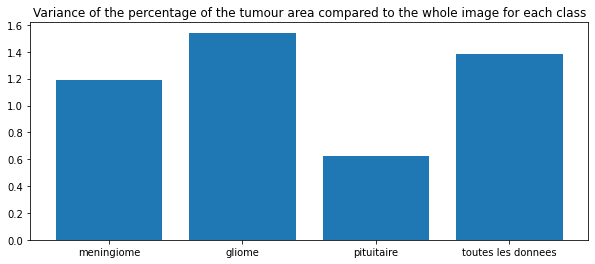

In [7]:
class_names = ['meningiome', 'gliome', 'pituitaire', 'toutes les donnees']

percentage_class1_std = np.std(percentage_class1)
percentage_class2_std = np.std(percentage_class2)
percentage_class3_std = np.std(percentage_class3)
percentage_all_data_std = np.std(percentage_all_data)

list_std = []
list_std.append(percentage_class1_std)
list_std.append(percentage_class2_std)
list_std.append(percentage_class3_std)
list_std.append(percentage_all_data_std)

plt.figure(figsize=(10,4))  
plt.bar(class_names, height=list_std)
plt.title('Variance of the percentage of the tumour area compared to the whole image for each class')
plt.savefig("out/variance_percentage_tumour_area.png")
plt.show()

# Localisation de la moyenne de la tumeur

In [8]:
def calculate_mean_tumor_per_class(list_file_class):
    
    list_mean_tumor_per_class_coord_x = []
    list_mean_tumor_per_class_coord_y = []
    
    for i in range(len(list_file_class)):
        array_tumorBorder_i = list_file_class[i]['cjdata']['tumorBorder']
        array_tumorBorder_ix = array_tumorBorder_i[0:len(array_tumorBorder_i):2]    
        array_tumorBorder_iy = array_tumorBorder_i[1:len(array_tumorBorder_i):2]
        mean_tumor_ix = array_tumorBorder_ix.sum() / len(array_tumorBorder_ix)
        mean_tumor_iy = array_tumorBorder_iy.sum() / len(array_tumorBorder_iy)
        list_mean_tumor_per_class_coord_x.append(mean_tumor_ix)
        list_mean_tumor_per_class_coord_y.append(mean_tumor_iy)
    
    return list_mean_tumor_per_class_coord_x, list_mean_tumor_per_class_coord_y

mean_tumor_class1_coord_x, mean_tumor_class1_coord_y = calculate_mean_tumor_per_class(list_file_class1)
mean_tumor_class2_coord_x, mean_tumor_class2_coord_y = calculate_mean_tumor_per_class(list_file_class2)
mean_tumor_class3_coord_x, mean_tumor_class3_coord_y = calculate_mean_tumor_per_class(list_file_class3)

In [9]:
mean_tumor_all_data_coord_x = mean_tumor_class1_coord_x + mean_tumor_class2_coord_x + mean_tumor_class3_coord_x
mean_tumor_all_data_coord_y = mean_tumor_class1_coord_y + mean_tumor_class2_coord_y + mean_tumor_class3_coord_y

In [10]:
list_coord_class = []
list_coord_class_ligne = []
for i in range(len(mean_tumor_all_data_coord_x)):
    list_coord_class_ligne.append(mean_tumor_all_data_coord_x[i])
    list_coord_class_ligne.append(mean_tumor_all_data_coord_y[i])
    if i < 708:
        list_coord_class_ligne.append(1)
    if i >= 708 and i < 2134:
        list_coord_class_ligne.append(2)
    if i >= 2134 :
        list_coord_class_ligne.append(3)
    list_coord_class.append(list_coord_class_ligne)
    list_coord_class_ligne = []

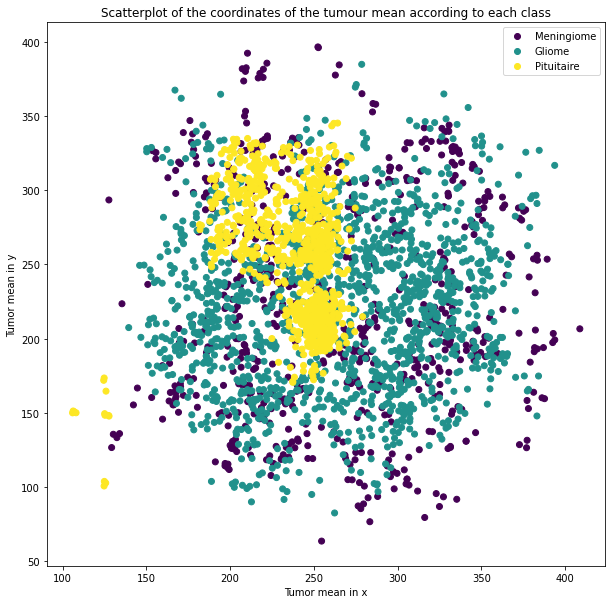

In [11]:
array = np.asarray(list_coord_class)
plt.figure(figsize=(10,10))
plt.title('Scatterplot of the coordinates of the tumour mean according to each class')
scatter  = plt.scatter(array[:,0], array[:,1], c= array[:,2])
plt.xlabel("Tumor mean in x")
plt.ylabel("Tumor mean in y")
classes = ['Meningiome', 'Gliome', 'Pituitaire']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.savefig("out/scatterplot_tumour_mean.png")
plt.show()
